## Homework #15 - Outlier Detection

### Overview:
During the last topic, you learned the art of plotting using matplotlib
and seaborn in python. Also, we have learned what Outliers are and
how to identify them. In this topic, you should explore a little bit more
the given Data Set and plot the information about the outliers.

### Task:
or this chapter, you will have to do the following:
* Import and prepare the Data Set.
* Find the 2 columns that correlate most significantly with the price
column.
* Create a temporary subset using these 2 columns.
* Train and predict using the Isolation Forest, OneClassSVM, Elliptic
Envelope, and LocalOutlierFactor.
* Create a grid 2x2 on scatter plots with the different colors for normal
samples and outliers for each algorithm.
* Try to make a conclusion based on these plots.
* Find the number of outliers on the whole Data Set (without the
target column) for different values of contamination for each outliers
detection algorithm.
* Create for each algorithm the line plot showing the dependence of
the number of outliers and the contamination value.
* Try to conclude.
* Split the Data Set into the train and test sets.
* Using the default settings of each outliers detection algorithm, find
and remove the outliers from the Data Set, creating a subset.
* Train on the initial and the gotten subset of the following algorithms: LinearRegression and KNN Regressor.
* Find the accuracy of each combination of the prediction and outliers
detection algorithms on the test subset.
* Create the table of the following structure.
* Make a conclusion based on the table that you got

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.covariance import EllipticEnvelope
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, LocalOutlierFactor

In [2]:
housing_dataset: pd.DataFrame = pd.read_csv("dataset/HousingData.csv")

In [3]:
housing_dataset.head(n=5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
housing_dataset.tail(n=5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
print(housing_dataset.isnull().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [7]:
corr_series = housing_dataset.corr().abs()['MEDV'].drop('MEDV').sort_values(ascending=False)
corr_series

LSTAT      0.735822
RM         0.695360
PTRATIO    0.507787
INDUS      0.481772
TAX        0.468536
NOX        0.427321
AGE        0.394656
CRIM       0.391363
RAD        0.381626
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
Name: MEDV, dtype: float64

In [8]:
highest_corr_cols = corr_series.iloc[:2].index
highest_corr_cols

Index(['LSTAT', 'RM'], dtype='object')

In [9]:
selected_housing_dataset: pd.DataFrame = housing_dataset[highest_corr_cols]
selected_housing_dataset.head(n=5)

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,NaN,7.147


In [10]:
selected_housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LSTAT   486 non-null    float64
 1   RM      506 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


In [11]:
print(selected_housing_dataset.isnull().sum())

LSTAT    20
RM        0
dtype: int64


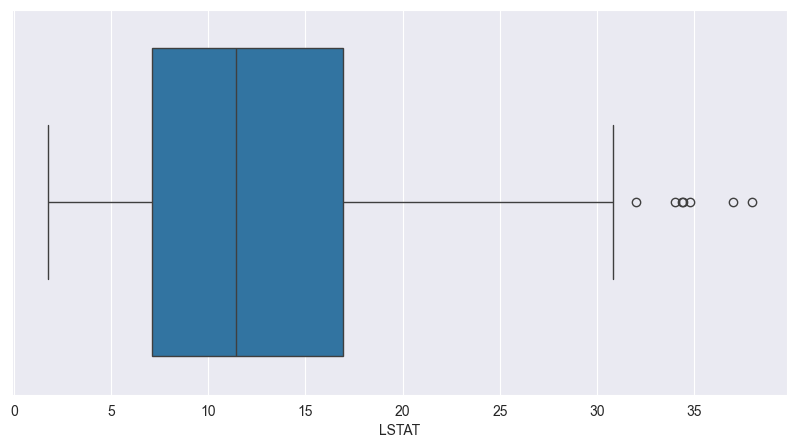

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=selected_housing_dataset['LSTAT'])
plt.show()

In [13]:
imputer_transformer = ColumnTransformer(
    transformers=[
        ('median_impute', SimpleImputer(strategy='median'), ['LSTAT'])
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform='pandas')

In [14]:
selected_housing_dataset = imputer_transformer.fit_transform(X=selected_housing_dataset)
selected_housing_dataset

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,11.43,7.147
...,...,...
501,11.43,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


For IsolationForest:
	Outliers: 104,
	Inliers: 402
For OneClassSVM:
	Outliers: 254,
	Inliers: 252
For EllipticEnvelope:
	Outliers: 51,
	Inliers: 455
For LocalOutlierFactor:
	Outliers: 20,
	Inliers: 486


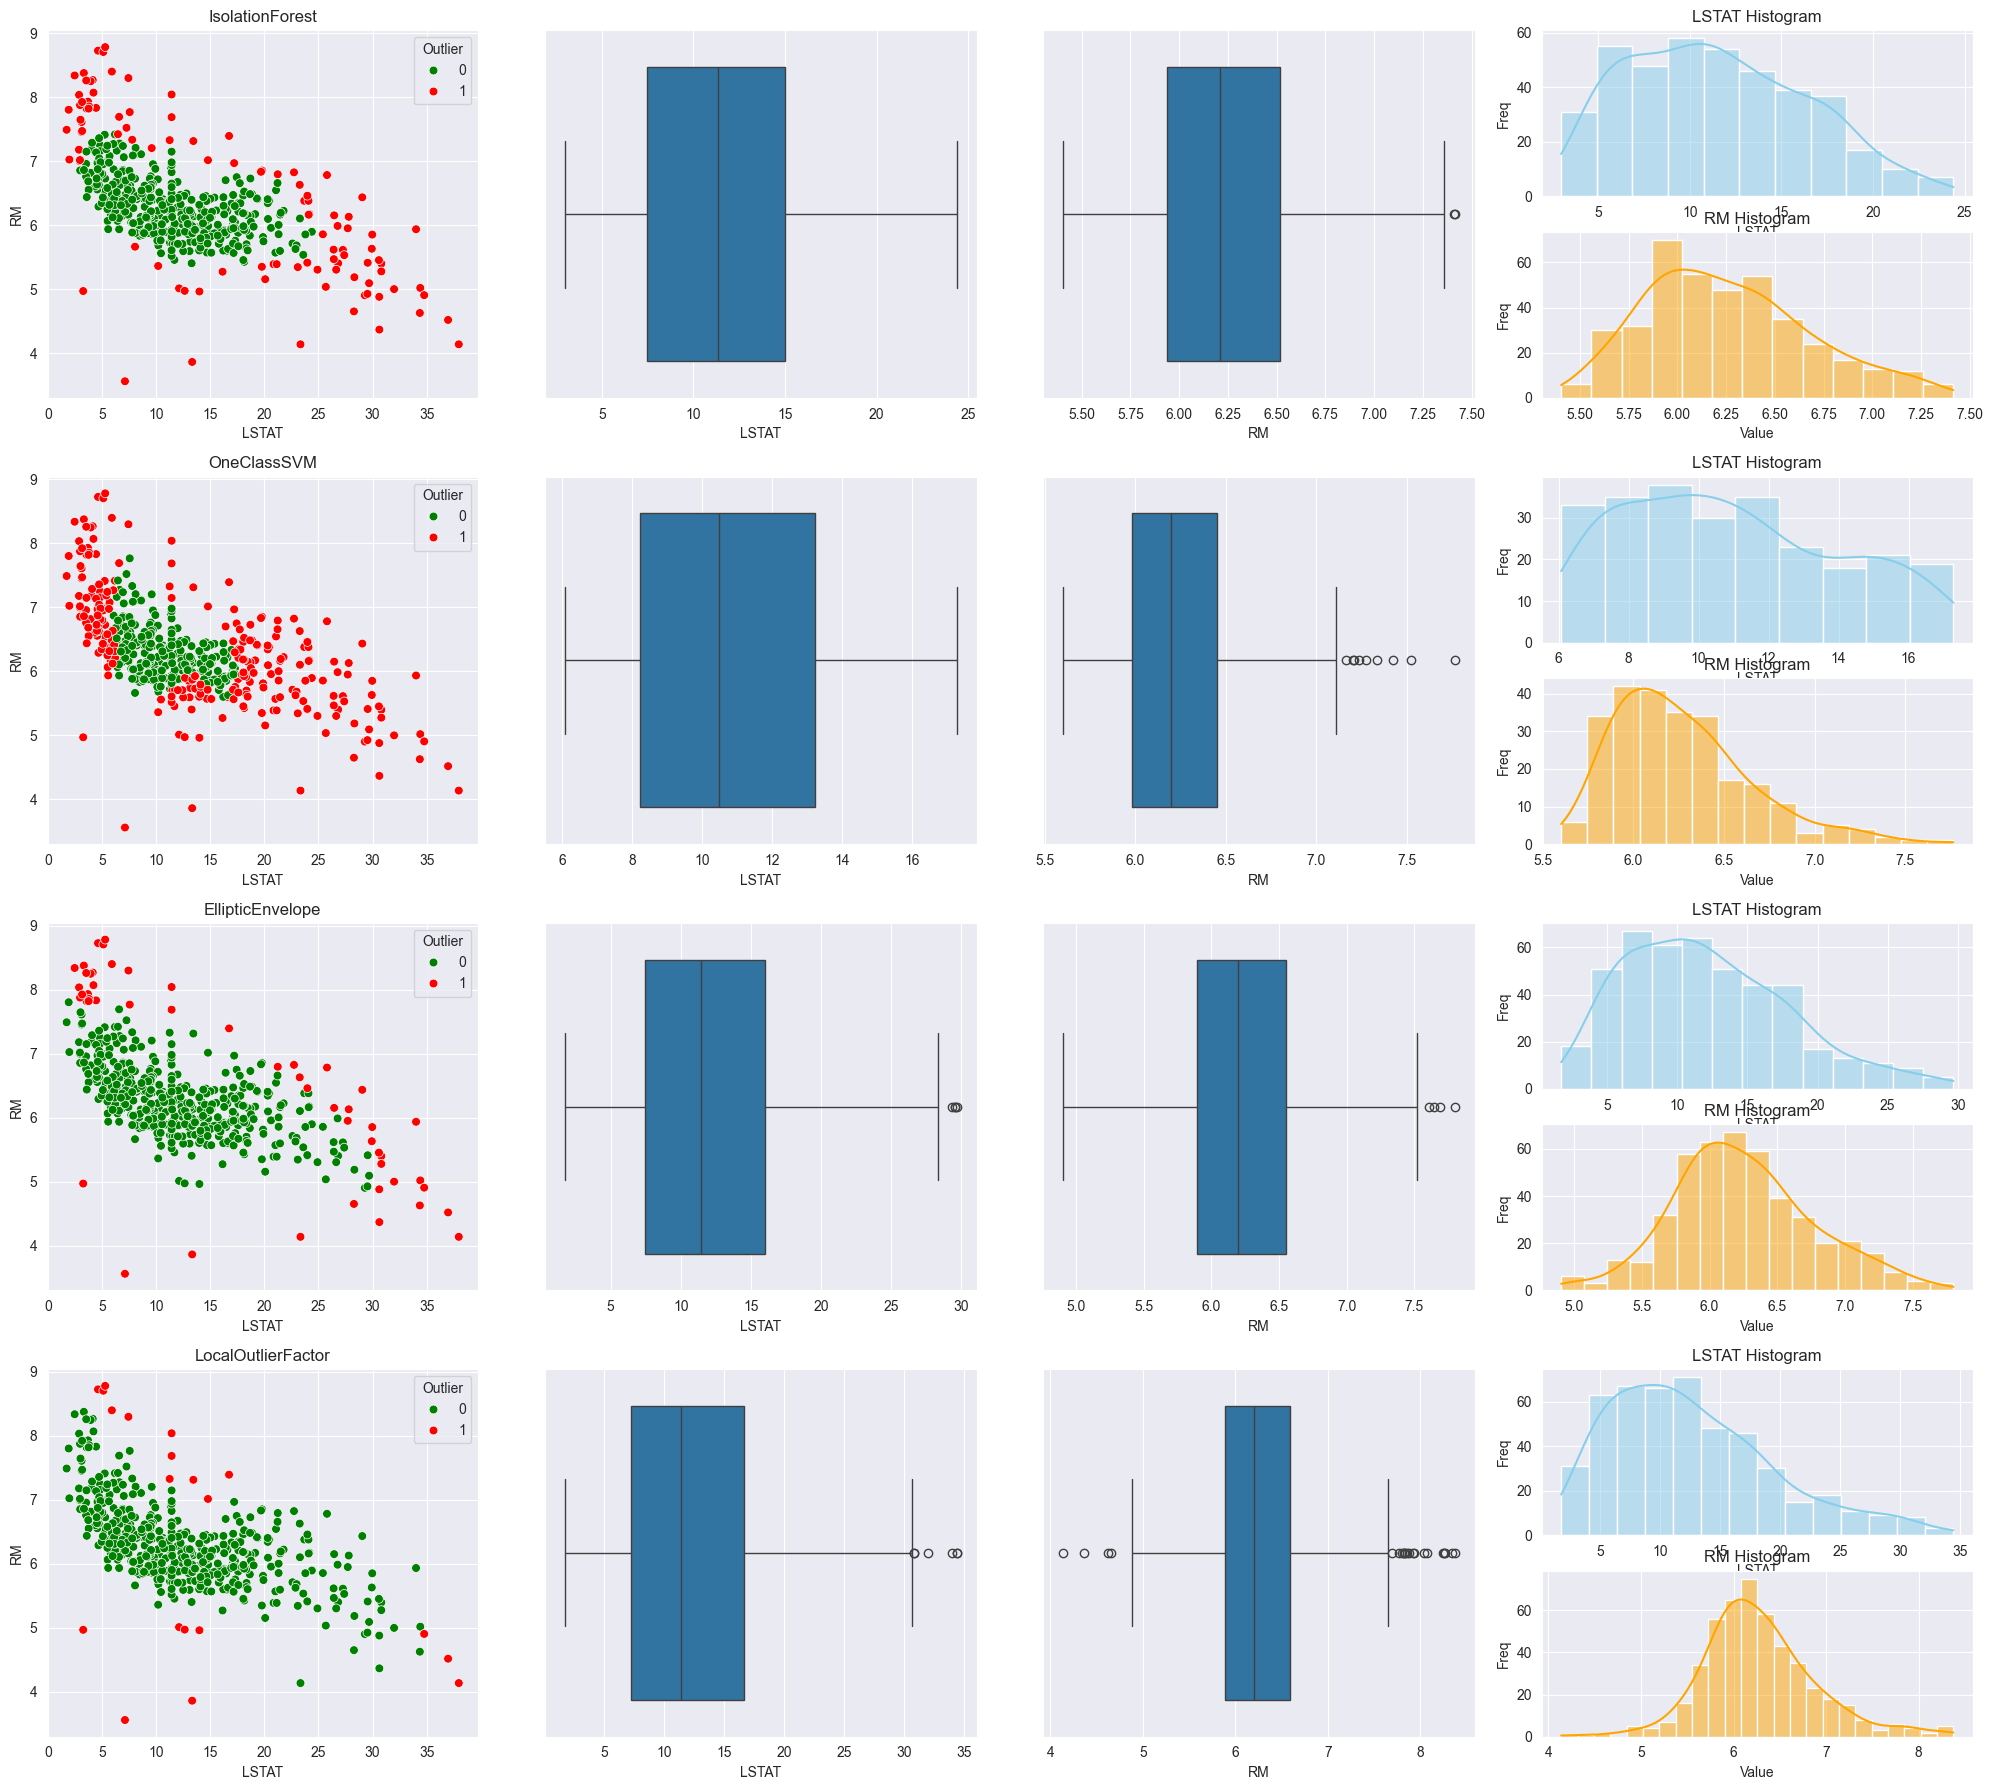

In [15]:
outlier_detection_models = [IsolationForest(), OneClassSVM(), EllipticEnvelope(), LocalOutlierFactor()]

fig = plt.figure(figsize=(20, 18))
outer_gs = gridspec.GridSpec(nrows=4, ncols=4, figure=fig)

for index, outlier_detection_model in enumerate(outlier_detection_models):
    is_outliers = outlier_detection_model.fit_predict(X=selected_housing_dataset.values)
    plot_df = selected_housing_dataset.copy()
    plot_df['IS_OUTLIER'] = np.where(is_outliers == -1, 1, 0)

    outliers_count = np.sum((plot_df['IS_OUTLIER'] == 1))
    inliners_count = np.sum((plot_df['IS_OUTLIER'] == 0))
    print(f'For {outlier_detection_model.__class__.__name__}:\n\tOutliers: {outliers_count},\n\tInliers: {inliners_count}')

    ax1 = fig.add_subplot(outer_gs[index, 0])
    sns.scatterplot(
        data=plot_df,
        x='LSTAT',
        y='RM',
        hue='IS_OUTLIER',
        palette={0: 'green', 1: 'red'},
        ax=ax1,
        s=40
    )
    ax1.set_title(outlier_detection_model.__class__.__name__)
    ax1.legend(title='Outlier')

    plot_df = plot_df[plot_df.IS_OUTLIER != 1]

    ax2 = fig.add_subplot(outer_gs[index, 1])
    sns.boxplot(data=plot_df, x='LSTAT', ax=ax2)

    ax3 = fig.add_subplot(outer_gs[index, 2])
    sns.boxplot(data=plot_df, x='RM', ax=ax3)

    inner_gs = outer_gs[index, 3].subgridspec(2, 1, height_ratios=[1, 1])

    ax4_top = fig.add_subplot(inner_gs[0])
    sns.histplot(data=plot_df, x='LSTAT', kde=True, color='skyblue', ax=ax4_top)
    ax4_top.set_title("LSTAT Histogram")
    ax4_top.set_ylabel("Freq")

    ax4_bottom = fig.add_subplot(inner_gs[1])
    sns.histplot(data=plot_df, x='RM', kde=True, color='orange', ax=ax4_bottom)
    ax4_bottom.set_title("RM Histogram")
    ax4_bottom.set_ylabel("Freq")
    ax4_bottom.set_xlabel("Value")

plt.tight_layout()
plt.show()

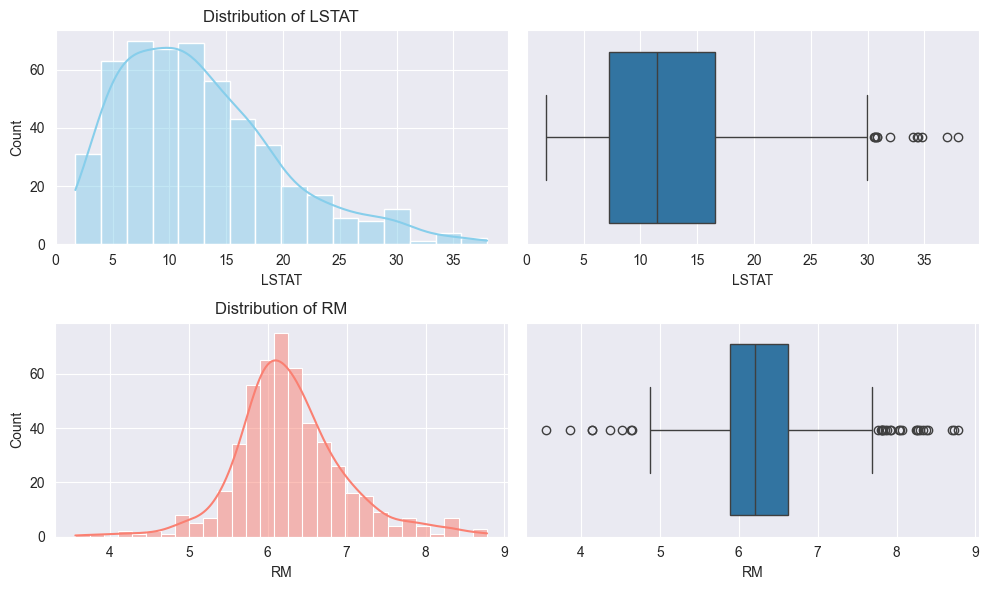

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

sns.histplot(data=selected_housing_dataset, x='LSTAT', ax=axes[0][0], kde=True, color='skyblue')
sns.boxplot(data=selected_housing_dataset, x='LSTAT', ax=axes[0][1])
sns.histplot(data=selected_housing_dataset, x='RM', ax=axes[1][0], kde=True, color='salmon')
sns.boxplot(data=selected_housing_dataset, x='RM', ax=axes[1][1])

axes[0][0].set_title('Distribution of LSTAT')
axes[1][0].set_title('Distribution of RM')

plt.tight_layout()
plt.show()

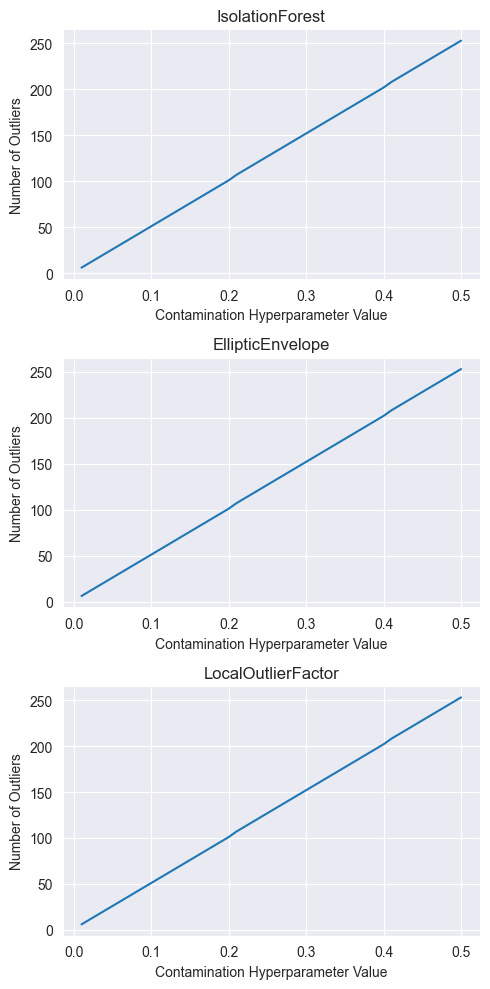

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 10))

outlier_detection_models = [IsolationForest(), EllipticEnvelope(), LocalOutlierFactor()]
contamination_hyperparameter = np.linspace(start=0.01, stop=0.5, num=50)

for index, outlier_detection_model in enumerate(outlier_detection_models):
    outliers_count_list = []
    for contamination_value in contamination_hyperparameter:
        outlier_detection_model.set_params(contamination=contamination_value)
        outliers_count = outlier_detection_model.fit_predict(X=selected_housing_dataset.values)
        outliers_count_list.append(np.sum((outliers_count == -1)))

    sns.lineplot(x=contamination_hyperparameter, y=outliers_count_list, ax=axes[index])
    axes[index].set_title(outlier_detection_model.__class__.__name__)
    axes[index].set_xlabel('Contamination Hyperparameter Value')
    axes[index].set_ylabel('Number of Outliers')

plt.tight_layout()
plt.show()

In [18]:
null_columns = housing_dataset.columns[housing_dataset.isnull().sum() > 0]
null_columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT'], dtype='object')

In [19]:
X_features, y_target = housing_dataset.drop(columns=['MEDV']), housing_dataset['MEDV']

In [20]:
X_features.head(n=5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN


In [21]:
y_target.head(n=5)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [22]:
column_transformer = ColumnTransformer(
    transformers=[
        ('impute', SimpleImputer(strategy='median'), null_columns)
    ],
    verbose_feature_names_out=False,
    remainder='passthrough'
).set_output(transform='pandas')

def create_pipeline():
    pipeline = Pipeline(
        steps=[
            ('transform', column_transformer),
            ('scale', MinMaxScaler().set_output(transform='pandas')),
        ]
    ).set_output(transform='pandas')

    return pipeline

### Linear Regression

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=.2, random_state=42)

In [24]:
results_df = pd.DataFrame(columns=['ML Model', 'Outlier Detection Model', 'MSE', 'MAE', "R2 Score"])

In [25]:
outlier_detection_models = [None, IsolationForest(), OneClassSVM(), EllipticEnvelope(), LocalOutlierFactor(novelty=True)]

In [26]:
for outlier_detection_model in outlier_detection_models:
    transformer_pipeline = create_pipeline()
    X_train_transformed = transformer_pipeline.fit_transform(X=X_train, y=y_train)
    X_test_transformed = transformer_pipeline.transform(X=X_test)
    y_train_transformed = y_train
    y_test_transformed = y_test
    if outlier_detection_model is not None:
        outlier_detection_model.fit(X=X_train_transformed.values)
        outliers_train = outlier_detection_model.predict(X=X_train_transformed.values)
        outliers_test = outlier_detection_model.predict(X=X_test_transformed.values)

        X_train_transformed = pd.DataFrame(data=X_train_transformed[outliers_train == 1], columns=X_train_transformed.columns, index=X_train_transformed[outliers_train == 1].index)
        # X_train_transformed = X_train_transformed[outliers_train == 1]
        y_train_transformed = y_train_transformed[outliers_train == 1]
        X_test_transformed = pd.DataFrame(data=X_test_transformed[outliers_test == 1], columns=X_test_transformed.columns, index=X_test_transformed[outliers_test == 1].index)
        # X_test_transformed = X_test_transformed[outliers_test == 1]
        y_test_transformed = y_test_transformed[outliers_test == 1]
    linear_regressor = LinearRegression()
    linear_regressor.fit(X=X_train_transformed, y=y_train_transformed)
    y_hat = linear_regressor.predict(X=X_test_transformed)
    results_df = pd.concat(
        [
            results_df,
            pd.DataFrame(
                data=[[
                    'Linear Regression',
                    'None' if outlier_detection_model is None else outlier_detection_model.__class__.__name__,
                    mean_squared_error(y_true=y_test_transformed, y_pred=y_hat),
                    mean_absolute_error(y_true=y_test_transformed, y_pred=y_hat),
                    r2_score(y_true=y_test_transformed, y_pred=y_hat),
                ]],
                columns=results_df.columns
            )
        ],
        axis=0,
        ignore_index=True
    )

C:\Users\user\AppData\Local\Temp\ipykernel_31500\3535222932.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat(


In [27]:
results_df

,ML Model,Outlier Detection Model,MSE,MAE,R2 Score
0,Linear Regression,None,24.983445,3.147609,0.659319
1,Linear Regression,IsolationForest,23.528691,2.922444,0.498115
2,Linear Regression,OneClassSVM,6.278716,1.948117,0.762695
3,Linear Regression,EllipticEnvelope,22.781302,2.991841,0.671491
4,Linear Regression,LocalOutlierFactor,23.123217,2.913569,0.689323


### K Neighbors Regressor

In [28]:
results_df_2 = pd.DataFrame(columns=['ML Model', 'Outlier Detection Model', 'MSE', 'MAE', "R2 Score"])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=.2, random_state=42)

In [30]:
outlier_detection_models = [None, IsolationForest(), OneClassSVM(), EllipticEnvelope(), LocalOutlierFactor(novelty=True)]

In [31]:
for outlier_detection_model in outlier_detection_models:
    transformer_pipeline = create_pipeline()
    X_train_transformed = transformer_pipeline.fit_transform(X=X_train, y=y_train)
    X_test_transformed = transformer_pipeline.transform(X=X_test)
    y_train_transformed = y_train
    y_test_transformed = y_test
    if outlier_detection_model is not None:
        outlier_detection_model.fit(X=X_train_transformed.values)
        outliers_train = outlier_detection_model.predict(X=X_train_transformed.values)
        outliers_test = outlier_detection_model.predict(X=X_test_transformed.values)

        X_train_transformed = pd.DataFrame(data=X_train_transformed[outliers_train == 1], columns=X_train_transformed.columns, index=X_train_transformed[outliers_train == 1].index)
        # X_train_transformed = X_train_transformed[outliers_train == 1]
        y_train_transformed = y_train_transformed[outliers_train == 1]
        X_test_transformed = pd.DataFrame(data=X_test_transformed[outliers_test == 1], columns=X_test_transformed.columns, index=X_test_transformed[outliers_test == 1].index)
        # X_test_transformed = X_test_transformed[outliers_test == 1]
        y_test_transformed = y_test_transformed[outliers_test == 1]
    linear_regressor = KNeighborsRegressor()
    linear_regressor.fit(X=X_train_transformed, y=y_train_transformed)
    y_hat = linear_regressor.predict(X=X_test_transformed)
    results_df_2 = pd.concat(
        [
            results_df_2,
            pd.DataFrame(
                data=[[
                    'K Nearest Regressor',
                    'None' if outlier_detection_model is None else outlier_detection_model.__class__.__name__,
                    mean_squared_error(y_true=y_test_transformed, y_pred=y_hat),
                    mean_absolute_error(y_true=y_test_transformed, y_pred=y_hat),
                    r2_score(y_true=y_test_transformed, y_pred=y_hat),
                ]],
                columns=results_df_2.columns
            )
        ],
        axis=0,
        ignore_index=True
    )

C:\Users\user\AppData\Local\Temp\ipykernel_31500\3215589724.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df_2 = pd.concat(


In [32]:
results_df_2

,ML Model,Outlier Detection Model,MSE,MAE,R2 Score
0,K Nearest Regressor,None,22.944165,2.866275,0.687127
1,K Nearest Regressor,IsolationForest,17.993996,2.409783,0.612326
2,K Nearest Regressor,OneClassSVM,9.146821,2.313448,0.654295
3,K Nearest Regressor,EllipticEnvelope,23.855720,2.853118,0.659211
4,K Nearest Regressor,LocalOutlierFactor,23.741292,2.927000,0.681019
